<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Descripteurs%20SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple d'utilisation de SIFT

Exécuter les 2 lignes suivantes pour colab.

In [13]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 544 (delta 19), reused 11 (delta 2), pack-reused 494
Receiving objects: 100% (544/544), 52.09 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (267/267), done.
/content/INF8770/INF8770/INF8770


In [14]:
!pip install opencv-python #il faut une version récente pour SIFT > 4.4
import cv2  
import matplotlib.pyplot as plt
import imutils
cv2.__version__

'4.5.5'

Lecture de deux images tests et affichage.

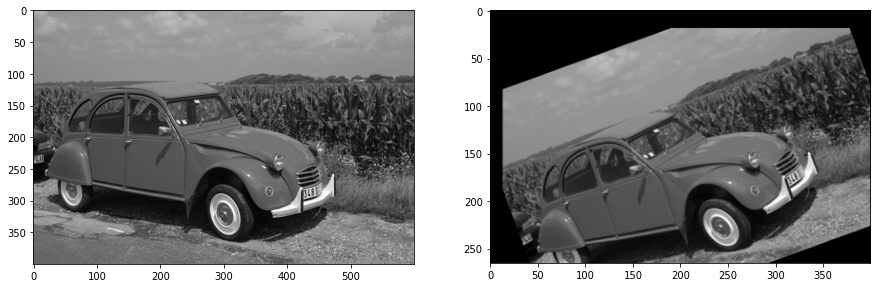

In [15]:
image1 = cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE) 
image2 = imutils.rotate(image2, 20) #Image tournée de 20 deg. 
image2 = imutils.translate(image2, 20,30) # On fait aussi une translation.
image2 = imutils.resize(image2, width=400) # On fait finalement une mise à l'échelle.

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points clefs sur les images. 

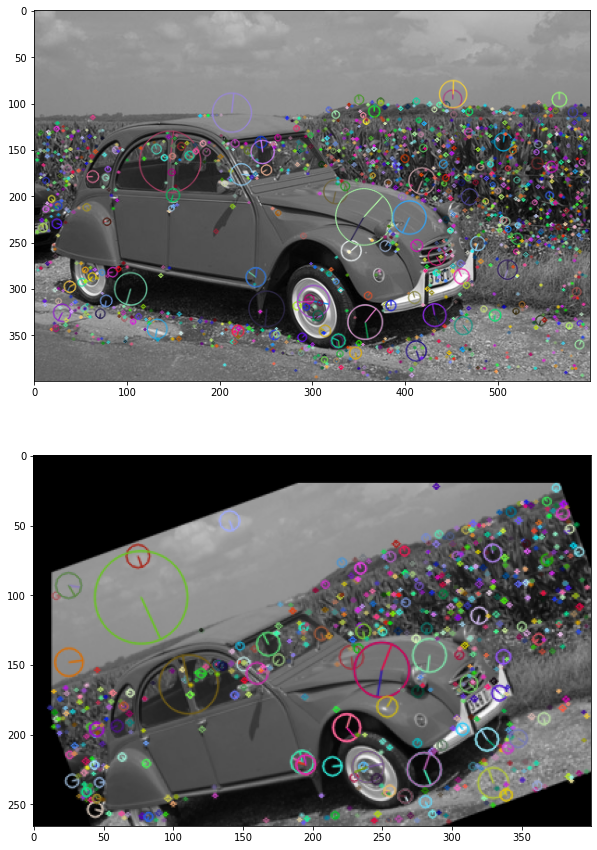

In [16]:
desc_sift = cv2.SIFT_create() 
pointsclefs1 = desc_sift.detect(image1,None)
pointsclefs2 = desc_sift.detect(image2,None)

#Le cercle représente l'échelle, et la ligne l'angle.
imageout1 = cv2.drawKeypoints(image1,pointsclefs1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(image2,pointsclefs2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(2, 1, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Description des points clefs. 

In [17]:
pointsclefs1,descripteurs1= desc_sift.compute(image1,pointsclefs1)
pointsclefs2,descripteurs2= desc_sift.compute(image2,pointsclefs2)

Mise en correspondance des points clefs.

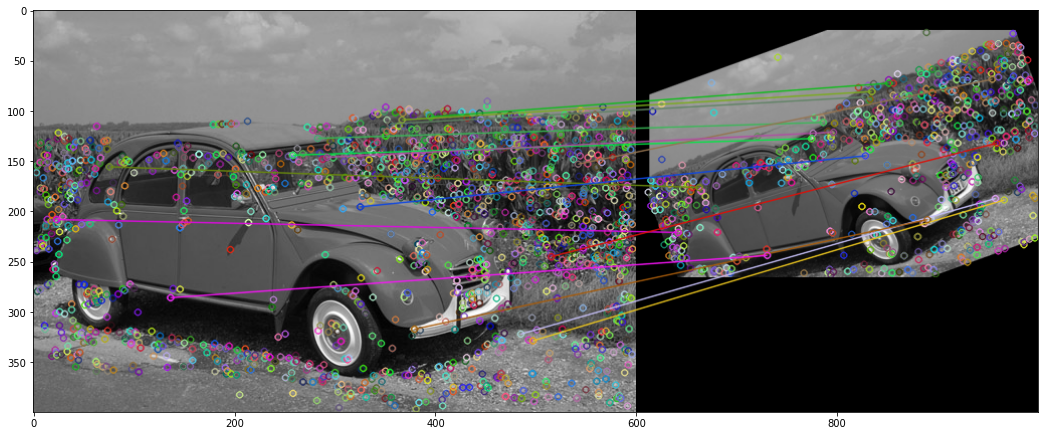

In [18]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(descripteurs1,descripteurs2)
correspondances = sorted(correspondances, key = lambda x:x.distance) #On affichera seulement quelques correspondances
plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(image1,pointsclefs1,image2,pointsclefs2,correspondances[0:15],2, None)
plt.imshow(imageout3)
plt.show()

On note qu'on peut faire des correspondances, malgré la rotation, translation et mise à l'échelle.